In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\corri\Documents\New Career\Achievment 6\Rabies Project\Data"

In [4]:
#Import cleaned data set
df_rabies = pd.read_csv(os.path.join(path, 'Prepared Data', 'Renamed_Total.csv'))

In [5]:
df_rabies.head(20)

,Unnamed: 0,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,11206,2010,Jan-Jun 2010,Algeria,Domestic,Cats,53,12,6,0,6,0,7742
1,11207,2010,Jan-Jun 2010,Algeria,Domestic,Cattle,1049,93,47,17,29,0,7742
2,11208,2010,Jan-Jun 2010,Algeria,Domestic,Dogs,550,168,135,0,65,0,7742
3,11209,2010,Jan-Jun 2010,Algeria,Domestic,Equidae,93,28,15,0,13,0,7742
4,11210,2010,Jan-Jun 2010,Algeria,Domestic,Goats,748,8,3,0,5,0,7742
5,11211,2010,Jan-Jun 2010,Algeria,Domestic,Sheep,4478,22,15,0,7,0,7742
6,11212,2010,Jan-Jun 2010,Algeria,Wild,Wildlife (species unspecified),1,1,1,0,0,0,7742
7,11213,2010,Jan-Jun 2010,Angola,Domestic,Cattle,143,1,0,0,1,0,226
8,11214,2010,Jan-Jun 2010,Angola,Domestic,Dogs,795,13,0,0,13,782,226
9,11215,2010,Jan-Jun 2010,Benin,Domestic,Dogs,0,1,0,0,1,0,112


In [6]:
# Drop unnecessary column
df_rabies = df_rabies.drop(columns = 'Unnamed: 0')

In [7]:
df_rabies.head(20)

,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,2010,Jan-Jun 2010,Algeria,Domestic,Cats,53,12,6,0,6,0,7742
1,2010,Jan-Jun 2010,Algeria,Domestic,Cattle,1049,93,47,17,29,0,7742
2,2010,Jan-Jun 2010,Algeria,Domestic,Dogs,550,168,135,0,65,0,7742
3,2010,Jan-Jun 2010,Algeria,Domestic,Equidae,93,28,15,0,13,0,7742
4,2010,Jan-Jun 2010,Algeria,Domestic,Goats,748,8,3,0,5,0,7742
5,2010,Jan-Jun 2010,Algeria,Domestic,Sheep,4478,22,15,0,7,0,7742
6,2010,Jan-Jun 2010,Algeria,Wild,Wildlife (species unspecified),1,1,1,0,0,0,7742
7,2010,Jan-Jun 2010,Angola,Domestic,Cattle,143,1,0,0,1,0,226
8,2010,Jan-Jun 2010,Angola,Domestic,Dogs,795,13,0,0,13,782,226
9,2010,Jan-Jun 2010,Benin,Domestic,Dogs,0,1,0,0,1,0,112


In [8]:
df_rabies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25952 entries, 0 to 25951
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25952 non-null  int64 
 1   Semester         25952 non-null  object
 2   Country          25952 non-null  object
 3   Animal Category  25952 non-null  object
 4   Species          25952 non-null  object
 5   Susceptible      25952 non-null  int64 
 6   Cases            25952 non-null  int64 
 7   Killed           25952 non-null  int64 
 8   Slaughtered      25952 non-null  int64 
 9   Deaths           25952 non-null  int64 
 10  Vaccinated       25952 non-null  int64 
 11  Total Cases      25952 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.4+ MB


In [9]:
#Summary stats
df_rabies.describe()

,Year,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
count,25952.000000,2.595200e+04,25952.000000,25952.000000,25952.000000,25952.000000,2.595200e+04,25952.000000
mean,2014.718866,3.822893e+03,7.446401,2.330919,0.135789,5.962546,4.218992e+03,7020.824638
std,3.158540,1.739252e+05,35.678112,31.955536,6.198928,31.895096,3.680454e+05,7158.797751
min,2010.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,2012.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000e+00,1169.000000
50%,2015.000000,0.000000e+00,2.000000,0.000000,0.000000,2.000000,0.000000e+00,3951.000000
75%,2017.000000,2.400000e+01,6.000000,0.000000,0.000000,5.000000,0.000000e+00,11123.000000
max,2022.000000,1.278000e+07,3226.000000,2224.000000,823.000000,3226.000000,4.775152e+07,20587.000000


In [10]:
# Check for missing values
df_rabies.isnull().sum()

Year               0
Semester           0
Country            0
Animal Category    0
Species            0
Susceptible        0
Cases              0
Killed             0
Slaughtered        0
Deaths             0
Vaccinated         0
Total Cases        0
dtype: int64

In [11]:
# Check for duplicates
dup = df_rabies.duplicated()

In [12]:
dup.shape

(25952,)

### Rabies is always fatal so each case should have a corresponding death.  Hypothesis: as rabies cases increase deaths increase.

<function matplotlib.pyplot.show(close=None, block=None)>

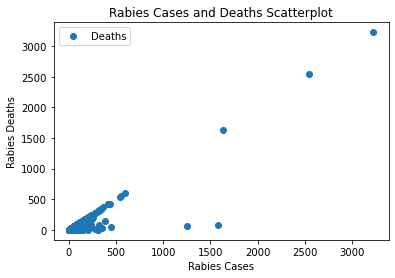

In [13]:
# Scatterplot
df_rabies.plot(x = 'Cases', y = 'Deaths', style = 'o')
plt.title('Rabies Cases and Deaths Scatterplot')
plt.xlabel('Rabies Cases')
plt.ylabel('Rabies Deaths')
plt.show

In [14]:
# Change variables into Numpy arrays and separate objects
X = df_rabies['Cases'].values.reshape(-1, 1)
y = df_rabies['Deaths'].values.reshape(-1, 1)

In [15]:
X

array([[ 12],
       [ 93],
       [168],
       ...,
       [  1],
       [  1],
       [  1]], dtype=int64)

In [16]:
y

array([[ 6],
       [29],
       [65],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
# Create regression object
regression = LinearRegression()

In [19]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict y using X
y_predicted = regression.predict(X_test)

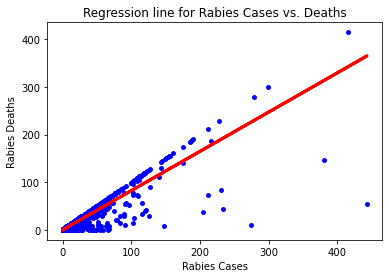

In [21]:
# Plot the regression line
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Regression line for Rabies Cases vs. Deaths')
plot_test.xlabel('Rabies Cases')
plot_test.ylabel('Rabies Deaths')
plot_test.show()

In [22]:
# Create objects to contain model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [23]:
# Print summary stats
print('Slope:', regression.coef_)
print('Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[0.82490643]]
Mean Squared Error: 52.4333025360044
R2 Score: 0.7695167689193246


In [24]:
# Dataframe for actual vs predicted values
data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,1,0.621101
1,6,5.570540
2,10,8.045259
3,1,0.621101
4,41,33.617358
5,34,27.843013
6,5,6.395446
7,1,0.621101
8,3,2.270914
9,33,27.018107


### The slope is 0.82 so as cases increase so do deaths.  The mse score is 52.4 which is reasonable (data points for deaths range from 0 to 3226). The R2 score of 0.769 is lower than expected (ideally it should have been 1.0).  This indicates that there is data missing but not so much that the results are unusable.

In [9]:
# Create a dataset with only the countries that have provided the most regular reporting (as determined in the choropleth mapping)
df_active = df_rabies[df_rabies['Country'].isin(['Russia', 'Brazil', 'India', 'Ukraine', 'Algeria', 'Turkey', 'South Africa'])]

In [10]:
df_active.head(20)

,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,2010,Jan-Jun 2010,Algeria,Domestic,Cats,53,12,6,0,6,0,7742
1,2010,Jan-Jun 2010,Algeria,Domestic,Cattle,1049,93,47,17,29,0,7742
2,2010,Jan-Jun 2010,Algeria,Domestic,Dogs,550,168,135,0,65,0,7742
3,2010,Jan-Jun 2010,Algeria,Domestic,Equidae,93,28,15,0,13,0,7742
4,2010,Jan-Jun 2010,Algeria,Domestic,Goats,748,8,3,0,5,0,7742
5,2010,Jan-Jun 2010,Algeria,Domestic,Sheep,4478,22,15,0,7,0,7742
6,2010,Jan-Jun 2010,Algeria,Wild,Wildlife (species unspecified),1,1,1,0,0,0,7742
120,2010,Jan-Jun 2010,South Africa,Domestic,Cattle,35,7,1,0,6,14355,4436
121,2010,Jan-Jun 2010,South Africa,Domestic,Dogs,37,6,1,0,5,3274,4436
122,2010,Jan-Jun 2010,South Africa,Domestic,Equidae,0,1,0,0,1,125,4436


In [12]:
df_active.shape

(9263, 12)

In [23]:
df_active.describe()

,Year,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
count,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9.263000e+03,9263.000000
mean,2014.695671,213.257908,9.138292,2.135377,0.104934,7.039080,9.307099e+03,15340.438843
std,3.190576,3590.292732,49.743852,12.008222,1.899437,47.970293,6.123280e+05,5300.891024
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4436.000000
25%,2012.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,9411.000000
50%,2015.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000e+00,16562.000000
75%,2017.000000,3.000000,8.000000,1.000000,0.000000,6.000000,0.000000e+00,20587.000000
max,2021.000000,285342.000000,3226.000000,389.000000,140.000000,3226.000000,4.775152e+07,20587.000000


<function matplotlib.pyplot.show(close=None, block=None)>

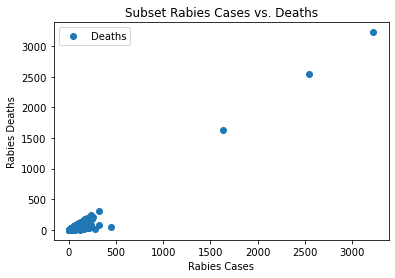

In [13]:
# Check scatterplot of data subset
df_active.plot(x = 'Cases', y = 'Deaths', style = 'o')
plt.title('Subset Rabies Cases vs. Deaths')
plt.xlabel('Rabies Cases')
plt.ylabel('Rabies Deaths')
plt.show

In [14]:
# Reshape into a Numpy array
X = df_active['Cases'].values.reshape(-1,1)
y = df_active['Deaths'].values.reshape(-1, 1)

In [15]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [16]:
#Create regression object
regression = LinearRegression()

In [17]:
#Train the model
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
#Predict y using X
y_predicted = regression.predict(X_test)

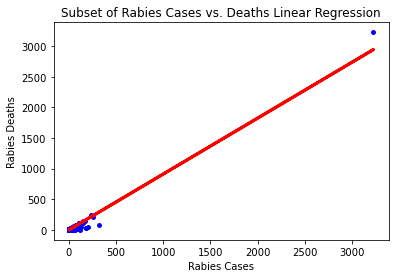

In [19]:
#Plot the regression line
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Subset of Rabies Cases vs. Deaths Linear Regression')
plot_test.xlabel('Rabies Cases')
plot_test.ylabel('Rabies Deaths')
plot_test.show()

In [20]:
#Objects for model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
#Print summary stats
print('Slope:', regression.coef_)
print('Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[0.91238397]]
Mean Squared Error: 101.31720159376081
R2 Score: 0.9741709592361377


In [22]:
#Dataframe for actual vs. predicted y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,2,0.489576
1,1,-0.422808
2,3,1.401960
3,1,0.489576
4,1,0.489576
5,1,-0.422808
6,10,7.788647
7,2,0.489576
8,1,-0.422808
9,1,0.489576


### While using a subset of the data has improved the R2 score (0.974) the mse also increased (101.3) which is supported by looking at the dataframe of the actual vs. predicted values.  The subset of data doesn't match as well.

### While the correlation was very small I suspect as Susceptible numbers rise the Vaccinated numbers should rise as well.

<function matplotlib.pyplot.show(close=None, block=None)>

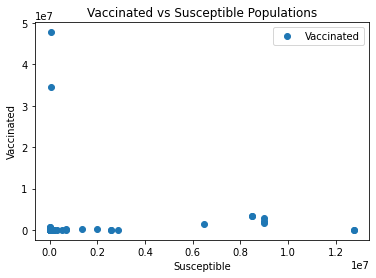

In [10]:
# Create scatterplot of Susceptible vs. Vaccinated
df_rabies.plot(x = 'Susceptible', y = 'Vaccinated', style = 'o')
plt.title('Vaccinated vs Susceptible Populations')
plt.xlabel('Susceptible')
plt.ylabel('Vaccinated')
plt.show

In [11]:
# Reshape variables into Numpy array
X = df_rabies['Susceptible'].values.reshape(-1,1)
y = df_rabies['Vaccinated'].values.reshape(-1,1)

In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
# Create regression object
regression = LinearRegression()

In [14]:
# Create model with training set
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
# Predict y using X
y_predicted = regression.predict(X_test)

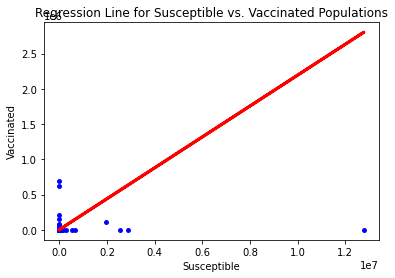

In [16]:
# Plot the regression line
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Regression Line for Susceptible vs. Vaccinated Populations')
plot_test.xlabel('Susceptible')
plot_test.ylabel('Vaccinated')
plot_test.show()

In [17]:
# Objects for model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [18]:
# Print summary stats
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print ('R2 Score:', r2)

Slope: [[0.2189553]]
Mean squared error: 1266092250.127686
R2 Score: -9.10045124960342


### These results prove that if there is a relationship between Susceptible and Vaccinated populations it is not a linear regression (vaccinated numbers don't increase when susceptible numbers increase).